In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
death = pd.read_csv("Age_group_UK_death_1974-2018.csv") 
birth = pd.read_csv("Crude_birth_rate_1938-2018.csv")
people = pd.read_csv("Age_group_population_UK_1982-2019.csv")
origin_dr = pd.read_csv("death_rate_1982-2018.csv")

In [3]:
A = death.iloc[-1, :]
totaldeath = np.array(A[9:], dtype=np.float)    #extract total death data from 1982 to 2018
totaldeath

array([662801., 659101., 644918., 670656., 660735., 644342., 649178.,
       657733., 641799., 646181., 634238., 658194., 626222., 641712.,
       638879., 632517., 627592., 629476., 610579., 604393., 608045.,
       612085., 584791., 582964., 572224., 574687., 579697., 559617.,
       561666., 552232., 569024., 576458., 570341., 602782., 597206.,
       607172., 616014.])

In [4]:
B = people.iloc[-1,:]
totalpopu = np.array(B[1:-1],dtype = np.float)       #extract total population data from 1982 to 2018
deathrate = totaldeath/totalpopu * 1000             # calculate total deathrate from 1982-2018
deathrate

array([11.7714307 , 11.6971177 , 11.42262534, 11.84529981, 11.64017948,
       11.31814509, 11.37605515, 11.49149581, 11.17914176, 11.24990425,
       11.01398286, 11.40446722, 10.82279378, 11.05934745, 10.98407781,
       10.84678069, 10.73267334, 10.72648051, 10.36888413, 10.22436412,
       10.24236614, 10.26356908,  9.75458631,  9.64960086,  9.40740642,
        9.37207549,  9.37660355,  8.98831725,  8.94950396,  8.72609204,
        8.93216752,  8.99231135,  8.82925197,  9.25789718,  9.09708611,
        9.19397175,  9.27235494])

In [5]:
C = birth['UK']                                 # extract birth rate
birthrate = np.array(C[0:37], dtype=np.float)    #extract birth rate data from year 2018 to 1982
birthr = np.zeros(birthrate.shape[0])                     # birth rate from 1982-2018
for i in range(birthrate.shape[0]):
       birthr[i] = birthrate[birthrate.shape[0]-i-1] 

In [6]:
rescale = birthr/deathrate

In [7]:
rescale

array([1.08737844, 1.09428667, 1.12933757, 1.12280822, 1.14259407,
       1.21044569, 1.21307429, 1.18348388, 1.24338704, 1.22667711,
       1.234794  , 1.15744118, 1.2011686 , 1.13930773, 1.14711496,
       1.16163499, 1.1460332 , 1.10940396, 1.10908752, 1.10520321,
       1.1032607 , 1.13995433, 1.21993897, 1.24357475, 1.30748045,
       1.34441939, 1.36509984, 1.41294523, 1.44142067, 1.46686511,
       1.43302283, 1.34559398, 1.35911853, 1.28538909, 1.29711864,
       1.2399429 , 1.18632215])

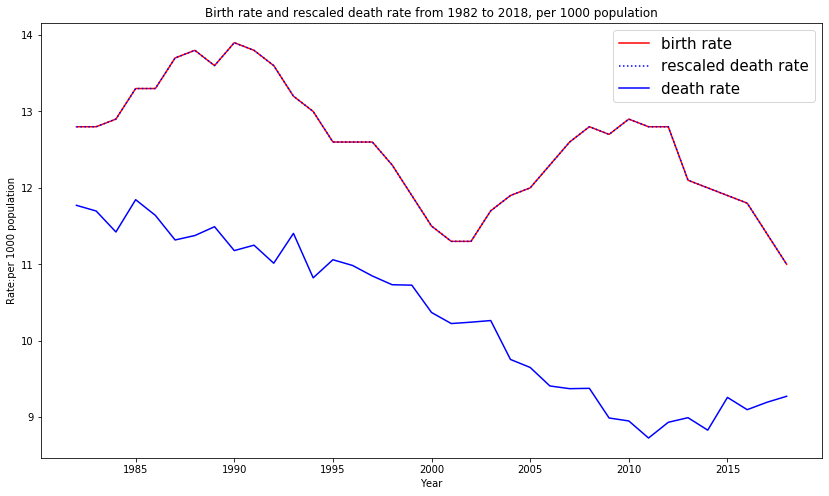

In [8]:
ndr = rescale * deathrate
year = np.arange(1982,2019)
plt.figure(figsize=(14,8))
plt.plot(year,birthr,'r',label='birth rate')
plt.plot(year,ndr,':b',label = 'rescaled death rate')
plt.plot(year,deathrate,'b',label='death rate')
plt.xlabel('Year')
plt.ylabel('Rate:per 1000 population')
plt.title('Birth rate and rescaled death rate from 1982 to 2018, per 1000 population')
plt.legend(loc="upper right",fontsize=15)

In [9]:
origin_dr

,Age,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0,11.071078,10.289551,9.814919,9.476948,9.587395,9.340108,9.058371,8.488387,8.087685,...,4.697685,4.425354,4.371031,4.102470,3.867230,3.872787,3.887900,3.839223,3.892815,3.798659
1,1-4,0.470693,0.440227,0.437997,0.453880,0.419677,0.412283,0.415094,0.411590,0.379371,...,0.182380,0.182216,0.181400,0.164441,0.171993,0.157327,0.156907,0.153781,0.136668,0.131597
2,5-9,0.217802,0.233934,0.216834,0.208045,0.190061,0.180881,0.192595,0.188570,0.171252,...,0.092607,0.093754,0.082846,0.089260,0.078427,0.084731,0.076370,0.068855,0.075119,0.073698
3,10-14,0.239221,0.232729,0.227918,0.241261,0.203523,0.215758,0.209469,0.196774,0.197994,...,0.108199,0.099043,0.088703,0.095069,0.095410,0.095968,0.090160,0.088550,0.085445,0.091218
4,15-19,0.558184,0.540169,0.511389,0.492952,0.515975,0.508591,0.502883,0.523425,0.515798,...,0.330107,0.288124,0.250944,0.244287,0.240265,0.247553,0.248701,0.236840,0.238106,0.266539
5,20-24,0.625743,0.577715,0.586574,0.581420,0.592772,0.597296,0.614464,0.621627,0.636032,...,0.446169,0.430917,0.384932,0.357726,0.346763,0.372038,0.361610,0.384602,0.338940,0.379728
6,25-29,0.645086,0.641497,0.647722,0.591791,0.604881,0.600073,0.602879,0.612943,0.670269,...,0.556427,0.495818,0.488614,0.458995,0.458776,0.463753,0.459557,0.482414,0.440776,0.482641
7,30-34,0.817135,0.785053,0.776584,0.762925,0.788730,0.814763,0.819074,0.778645,0.772770,...,0.709272,0.695085,0.657530,0.627612,0.642939,0.634013,0.645666,0.681463,0.634740,0.669675
8,35-39,1.143197,1.134764,1.105465,1.135080,1.098071,1.112824,1.126244,1.138160,1.156062,...,1.043295,1.002862,0.972499,0.914196,0.959713,0.940368,0.959318,0.923787,0.970062,0.979133
9,40-44,1.990655,1.938923,1.850108,1.875511,1.834752,1.776203,1.783093,1.722420,1.721721,...,1.550232,1.484937,1.452307,1.382656,1.426282,1.441074,1.426025,1.496862,1.451211,1.484452


In [10]:
year = ['1982', '1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']

In [11]:
ddd = {'Age': origin_dr['Age'][0:-2]}

In [12]:
for i in range(len(year)):
    k = year[i]
    new_dr = rescale[i] * origin_dr[k][0:-2]
    ddd.update({k : new_dr})

In [13]:
ddd

{'Age': 0         0
 1       1-4
 2       5-9
 3     10-14
 4     15-19
 5     20-24
 6     25-29
 7     30-34
 8     35-39
 9     40-44
 10    45-49
 11    50-54
 12    55-59
 13    60-64
 14    65-69
 15    70-74
 16    75-79
 17    80-84
 18      85+
 Name: Age, dtype: object, '1982': 0      12.038452
 1       0.511821
 2       0.236834
 3       0.260124
 4       0.606957
 5       0.680419
 6       0.701452
 7       0.888535
 8       1.243087
 9       2.164595
 10      3.835465
 11      6.814501
 12     11.718724
 13     18.324188
 14     29.317555
 15     46.272321
 16     72.510041
 17    113.850316
 18    206.403881
 Name: 1982, dtype: float64, '1983': 0      11.259719
 1       0.481735
 2       0.255991
 3       0.254672
 4       0.591100
 5       0.632185
 6       0.701981
 7       0.859073
 8       1.241757
 9       2.121738
 10      3.809726
 11      6.598975
 12     11.525705
 13     18.502402
 14     29.535671
 15     45.810179
 16     71.207697
 17    112.308591
 18    204

In [14]:
column = ['Age']
column = column + year

In [15]:
df = pd.DataFrame(ddd, columns= column)

In [16]:
df

,Age,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0,12.038452,11.259719,11.084356,10.640795,10.954500,11.305694,10.988477,10.045869,10.056123,...,6.637571,6.378797,6.411713,5.878933,5.203721,5.263576,4.997464,4.979928,4.826868,4.506433
1,1-4,0.511821,0.481735,0.494646,0.509620,0.479521,0.499046,0.503540,0.487111,0.471705,...,0.257693,0.262651,0.266089,0.235648,0.231432,0.213826,0.201687,0.199472,0.169460,0.156116
2,5-9,0.236834,0.255991,0.244878,0.233595,0.217163,0.218946,0.233632,0.223170,0.212932,...,0.130849,0.135139,0.121523,0.127911,0.105531,0.115160,0.098165,0.089313,0.093144,0.087429
3,10-14,0.260124,0.254672,0.257396,0.270890,0.232544,0.261163,0.254101,0.232878,0.246183,...,0.152879,0.142762,0.130116,0.136236,0.128382,0.130432,0.115891,0.114860,0.105947,0.108214
4,15-19,0.606957,0.591100,0.577531,0.553490,0.589550,0.615621,0.610034,0.619466,0.641337,...,0.466423,0.415308,0.368101,0.350070,0.323299,0.336454,0.319677,0.307209,0.295238,0.316202
5,20-24,0.680419,0.632185,0.662440,0.652823,0.677298,0.722994,0.745390,0.735685,0.790834,...,0.630412,0.621133,0.564643,0.512629,0.466602,0.505644,0.464809,0.498874,0.420266,0.450480
6,25-29,0.701452,0.701981,0.731497,0.664468,0.691133,0.726356,0.731337,0.725408,0.833404,...,0.786201,0.714683,0.716731,0.657751,0.617326,0.630296,0.590710,0.625748,0.546537,0.572568
7,30-34,0.888535,0.859073,0.877025,0.856619,0.901198,0.986226,0.993598,0.921514,0.960852,...,1.002162,1.001911,0.964508,0.899382,0.865135,0.861698,0.829932,0.883938,0.787041,0.794451
8,35-39,1.243087,1.241757,1.248443,1.274478,1.254650,1.347013,1.366218,1.346994,1.437432,...,1.474119,1.445546,1.426525,1.310063,1.291384,1.278071,1.233097,1.198261,1.202821,1.161568
9,40-44,2.164595,2.121738,2.089396,2.105839,2.096376,2.149997,2.163024,2.038456,2.140766,...,2.190393,2.140419,2.130338,1.981378,1.919196,1.958590,1.832997,1.941608,1.799419,1.761039


In [17]:
df.to_csv (r'rescaled_death_rate.csv', index = False, header=True)

In [18]:
#check 

In [19]:
check = pd.read_csv("rescaled_death_rate.csv") 
check

,Age,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0,12.038452,11.259719,11.084356,10.640795,10.954500,11.305694,10.988477,10.045869,10.056123,...,6.637571,6.378797,6.411713,5.878933,5.203721,5.263576,4.997464,4.979928,4.826868,4.506433
1,1-4,0.511821,0.481735,0.494646,0.509620,0.479521,0.499046,0.503540,0.487111,0.471705,...,0.257693,0.262651,0.266089,0.235648,0.231432,0.213826,0.201687,0.199472,0.169460,0.156116
2,5-9,0.236834,0.255991,0.244878,0.233595,0.217163,0.218946,0.233632,0.223170,0.212932,...,0.130849,0.135139,0.121523,0.127911,0.105531,0.115160,0.098165,0.089313,0.093144,0.087429
3,10-14,0.260124,0.254672,0.257396,0.270890,0.232544,0.261163,0.254101,0.232878,0.246183,...,0.152879,0.142762,0.130116,0.136236,0.128382,0.130432,0.115891,0.114860,0.105947,0.108214
4,15-19,0.606957,0.591100,0.577531,0.553490,0.589550,0.615621,0.610034,0.619466,0.641337,...,0.466423,0.415308,0.368101,0.350070,0.323299,0.336454,0.319677,0.307209,0.295238,0.316202
5,20-24,0.680419,0.632185,0.662440,0.652823,0.677298,0.722994,0.745390,0.735685,0.790834,...,0.630412,0.621133,0.564643,0.512629,0.466602,0.505644,0.464809,0.498874,0.420266,0.450480
6,25-29,0.701452,0.701981,0.731497,0.664468,0.691133,0.726356,0.731337,0.725408,0.833404,...,0.786201,0.714683,0.716731,0.657751,0.617326,0.630296,0.590710,0.625748,0.546537,0.572568
7,30-34,0.888535,0.859073,0.877025,0.856619,0.901198,0.986226,0.993598,0.921514,0.960852,...,1.002162,1.001911,0.964508,0.899382,0.865135,0.861698,0.829932,0.883938,0.787041,0.794451
8,35-39,1.243087,1.241757,1.248443,1.274478,1.254650,1.347013,1.366218,1.346994,1.437432,...,1.474119,1.445546,1.426525,1.310063,1.291384,1.278071,1.233097,1.198261,1.202821,1.161568
9,40-44,2.164595,2.121738,2.089396,2.105839,2.096376,2.149997,2.163024,2.038456,2.140766,...,2.190393,2.140419,2.130338,1.981378,1.919196,1.958590,1.832997,1.941608,1.799419,1.761039


In [21]:
check_dr = np.zeros(len(year))

In [22]:
for i in range(len(year)):
    check_dr[i] = round(np.sum(check[year[i]] * people[year[i]][:-1] /1000) / people[year[i]].iloc[-1] * 1000,1)

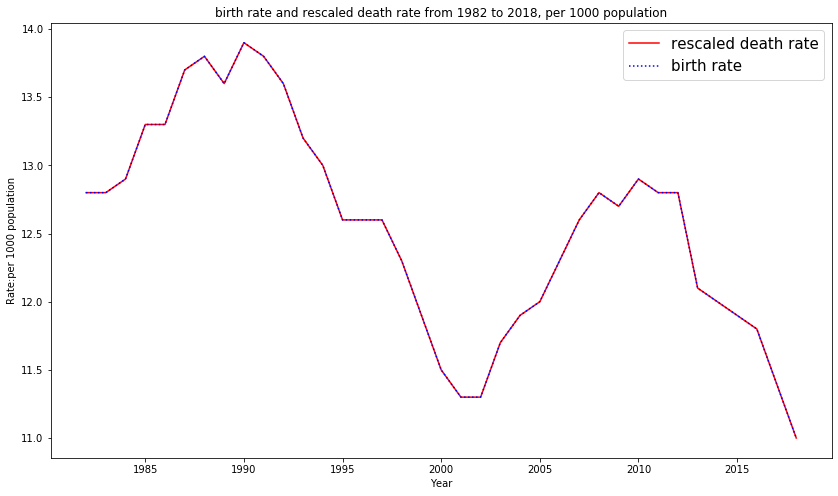

In [24]:
plt.figure(figsize=(14,8))
year_n = range(1982,2019)
plt.plot(year_n, check_dr, 'r',label = 'rescaled death rate')
plt.plot(year_n, birthr, ':b', label = 'birth rate')
plt.title('birth rate and rescaled death rate from 1982 to 2018, per 1000 population')
plt.xlabel('Year')
plt.ylabel('Rate:per 1000 population')
plt.legend(loc="upper right",fontsize=15);